In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

## 1. Working with the train dataset

In [372]:
trainUrl = 'C:/Users/AKINTOLA/Downloads/data-science-nigeria-ai-in-citie/train.csv'
df_train = pd.read_csv(trainUrl)
df_train.sample(10)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
185,676,3,"Bjorklund, Mr. Ernst Herbert",male,18.0,0,0,347090,7.7500,NaN,S,NaN,0
78,707,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S,NaN,0
296,507,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0
724,1181,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S,NaN,0
392,18,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,1
862,1289,3,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,NaN,S,NaN,0
533,633,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,NaN,0
494,1114,3,"Pearce, Mr. Ernest",male,NaN,0,0,343271,7.0000,NaN,S,NaN,0
707,253,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4,1
36,814,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,NaN,0


## Converting Numerical features of NaN values with its mean value 
## Converting some categorical features with 0 and it's actual value

In [373]:
import math as mt
mean_age = math.floor(df_train['age'].mean())

df_train['age'] = df_train['age'].fillna(mean_age)

df_train['MedBoat_extract'] = np.where(df_train['MedBoat'].isnull(), 0, df_train['MedBoat'].values)

df_train['cabin_extract'] = np.where(df_train['cabin'].isnull(), 0, df_train['cabin'].values)

df_train['embarked_extract'] = np.where(df_train['embarked'].isnull(), 0, df_train['embarked'].values)

df_train['fare'] =  np.where(df_train['fare'].isnull(), mt.floor(df_train['fare'].mean()), df_train['fare'].values)

df_train.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived,MedBoat_extract,cabin_extract,embarked_extract
0,1214,3,"Smiljanic, Mr. Mile",male,29.0,0,0,315037,8.6625,NaN,S,NaN,0,0,0,S
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0,0,0,S
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1,11,0,S
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.0,8,2,CA. 2343,69.5500,NaN,S,NaN,0,0,0,S
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0,0,0,S


In [374]:
df_train['fare'] = np.where(df_train['fare'] >= 80, df_train['fare'].mean(), df_train['fare'].values)

## Function that seaches the name feature for any name that contains master then create a new feature and place 1 if name contains master otherwise replace with zero

In [375]:
def testFunc(x):
    num = x.find('Master')
    if(num > -1):
#         print(x)
        return 1
    else:
        return 0

df_train['contains_Master'] = df_train['name'].apply(testFunc)

## Feature engineering that inclues new features like relatives, travelled_alone .......

In [376]:
data = [df_train]
for df_train in data:
    df_train['relatives'] = df_train['Siblings_spouses'] + df_train['Parchil']
    df_train.loc[df_train['relatives'] > 0, 'travelled_alone'] = 'No'
    df_train.loc[df_train['relatives'] == 0, 'travelled_alone'] = 'Yes'
    
    

travelled_alone = df_train['travelled_alone'] == 'Yes'
travelled_not_alone = df_train['travelled_alone'] == 'No'    



first_class = df_train['ticket_class'] == 1
female = df_train['sex'] == 'female'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['travelled_alone'] = le.fit_transform(travelled_alone)
df_train['travelled_not_alone'] = le.fit_transform(travelled_not_alone)
df_train['first_class_ticket'] = le.fit_transform(first_class)
df_train['female survival'] = le.fit_transform(female)

df_train.sample(5)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,...,Survived,MedBoat_extract,cabin_extract,embarked_extract,contains_Master,relatives,travelled_alone,travelled_not_alone,first_class_ticket,female survival
178,97,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,33.708447,B58 B60,...,1,6,B58 B60,C,0,2,0,1,1,1
224,609,3,"Adams, Mr. John",male,26.0,0,0,341826,8.050000,NaN,...,0,0,0,S,0,0,1,0,0,0
853,1129,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.775000,NaN,...,0,0,0,S,0,1,0,1,0,0
146,194,1,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.000000,C106,...,0,0,C106,S,0,0,1,0,1,0
290,843,3,"Hagland, Mr. Konrad Mathias Reiersen",male,29.0,1,0,65304,19.966700,NaN,...,0,0,0,S,0,1,0,1,0,0


## Showing the importance of all types of medBoat that contributes to survival given using seaborn factorPlot

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


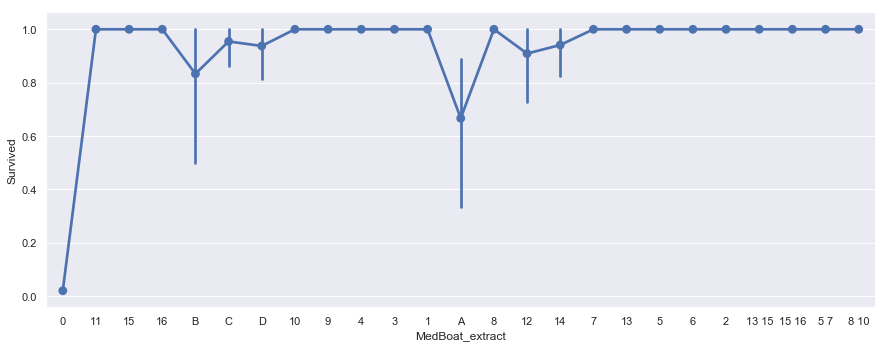

In [377]:
axes = sns.factorplot('MedBoat_extract','Survived', 
                      data=df_train, aspect = 2.5, )

In [378]:
children = (df_train['age']  < 16) & (df_train['contains_Master']  == 1 )


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['name'] = le.fit_transform(df_train['name'])
df_train['children'] = le.fit_transform(children)

In [379]:
df_train.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,...,MedBoat_extract,cabin_extract,embarked_extract,contains_Master,relatives,travelled_alone,travelled_not_alone,first_class_ticket,female survival,children
0,1214,3,784,male,29.0,0,0,315037,8.6625,NaN,...,0,0,S,0,0,1,0,0,0,0
1,677,3,97,male,26.0,0,0,349224,7.8958,NaN,...,0,0,S,0,0,1,0,0,0,0
2,534,2,683,female,19.0,0,0,250655,26.0000,NaN,...,11,0,S,0,0,1,0,0,1,0
3,1174,3,742,female,29.0,8,2,CA. 2343,69.5500,NaN,...,0,0,S,0,10,0,1,0,1,0
4,864,3,374,female,28.0,0,0,347086,7.7750,NaN,...,0,0,S,0,0,1,0,0,1,0


## Age distributuion

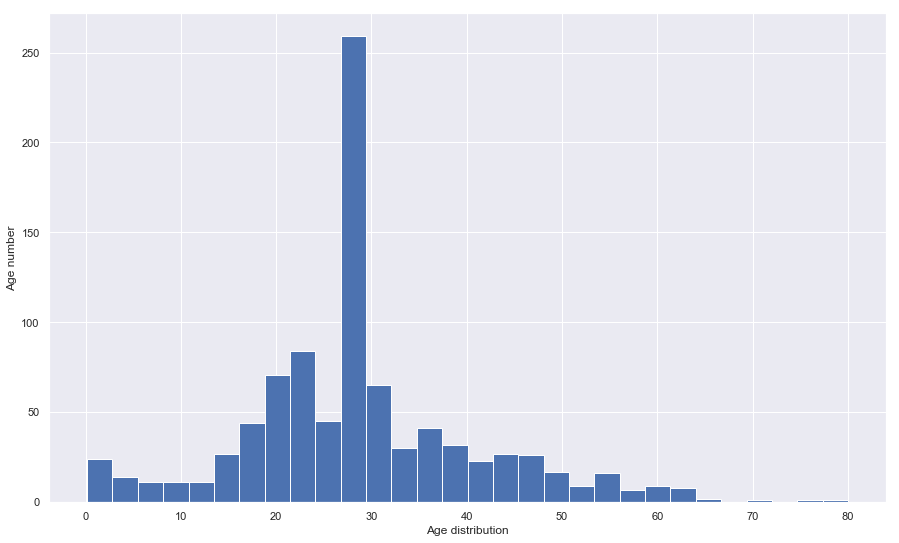

In [380]:
plt.figure(figsize = (15,9))
plt.hist(df_train['age'], bins = 30)
plt.xlabel('Age distribution')
plt.ylabel('Age number')
plt.show()

In [381]:
df_train.isna().sum() / len(df_train)

traveller_ID           0.000000
ticket_class           0.000000
name                   0.000000
sex                    0.000000
age                    0.000000
Siblings_spouses       0.000000
Parchil                0.000000
TickNum                0.000000
fare                   0.000000
cabin                  0.777293
embarked               0.001092
MedBoat                0.643013
Survived               0.000000
MedBoat_extract        0.000000
cabin_extract          0.000000
embarked_extract       0.000000
contains_Master        0.000000
relatives              0.000000
travelled_alone        0.000000
travelled_not_alone    0.000000
first_class_ticket     0.000000
female survival        0.000000
children               0.000000
dtype: float64

## Using the python inbuilt get_dummies method to extract each indvidual values and set it as a feature vector

In [382]:
data_dummy = pd.get_dummies(df_train[['sex','ticket_class', 'MedBoat_extract']])
data_dummy.head()

,ticket_class,sex_female,sex_male,MedBoat_extract_0,MedBoat_extract_1,MedBoat_extract_10,MedBoat_extract_11,MedBoat_extract_12,MedBoat_extract_13,MedBoat_extract_13 15,...,MedBoat_extract_5 7,MedBoat_extract_6,MedBoat_extract_7,MedBoat_extract_8,MedBoat_extract_8 10,MedBoat_extract_9,MedBoat_extract_A,MedBoat_extract_B,MedBoat_extract_C,MedBoat_extract_D
0,3,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dropping columns

In [383]:
column_drop = ['sex', 'TickNum', 'embarked_extract', 'cabin_extract', 'name','MedBoat','cabin', 'embarked', 'ticket_class', 'MedBoat_extract']
df_train.drop(column_drop, axis = 1, inplace = True)

In [384]:
df_train.head()

,traveller_ID,age,Siblings_spouses,Parchil,fare,Survived,contains_Master,relatives,travelled_alone,travelled_not_alone,first_class_ticket,female survival,children
0,1214,29.0,0,0,8.6625,0,0,0,1,0,0,0,0
1,677,26.0,0,0,7.8958,0,0,0,1,0,0,0,0
2,534,19.0,0,0,26.0000,1,0,0,1,0,0,1,0
3,1174,29.0,8,2,69.5500,0,0,10,0,1,0,1,0
4,864,28.0,0,0,7.7750,0,0,0,1,0,0,1,0


In [385]:
df_train.isna().sum()

traveller_ID           0
age                    0
Siblings_spouses       0
Parchil                0
fare                   0
Survived               0
contains_Master        0
relatives              0
travelled_alone        0
travelled_not_alone    0
first_class_ticket     0
female survival        0
children               0
dtype: int64

In [386]:
df_train.reset_index(drop = True, inplace = True)

In [387]:
data_dummy.reset_index(drop = True, inplace = True)

## concatenating the dummies and train dataset

In [388]:
df_train = pd.concat([df_train, data_dummy], axis = 1)
df_train.sample(10)

,traveller_ID,age,Siblings_spouses,Parchil,fare,Survived,contains_Master,relatives,travelled_alone,travelled_not_alone,...,MedBoat_extract_5 7,MedBoat_extract_6,MedBoat_extract_7,MedBoat_extract_8,MedBoat_extract_8 10,MedBoat_extract_9,MedBoat_extract_A,MedBoat_extract_B,MedBoat_extract_C,MedBoat_extract_D
776,577,31.0,0,0,21.0000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
698,53,17.0,0,0,47.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
684,800,29.0,0,0,7.7500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
655,476,30.0,1,1,26.0000,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
313,125,29.0,0,0,0.0000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
754,698,18.0,0,0,8.6625,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
854,565,25.0,0,0,13.0000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
246,557,25.0,0,1,26.0000,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
51,605,25.0,0,0,7.6500,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
882,957,29.0,3,1,25.4667,0,0,4,0,1,...,0,0,0,0,0,0,0,0,0,0


## Bringing some features to scale using StandardScaler so as to reduce overfitting.

In [389]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ss =  StandardScaler()
df_train['age'] = ss.fit_transform(np.array(df_train['age']).reshape(-1, 1))
df_train['fare'] = ss.fit_transform(np.array(df_train['fare']).reshape(-1, 1))

df_train.head()

,traveller_ID,age,Siblings_spouses,Parchil,fare,Survived,contains_Master,relatives,travelled_alone,travelled_not_alone,...,MedBoat_extract_5 7,MedBoat_extract_6,MedBoat_extract_7,MedBoat_extract_8,MedBoat_extract_8 10,MedBoat_extract_9,MedBoat_extract_A,MedBoat_extract_B,MedBoat_extract_C,MedBoat_extract_D
0,1214,-0.006586,0,0,-0.759692,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,677,-0.249258,0,0,-0.803833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,534,-0.815493,0,0,0.238460,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1174,-0.006586,8,2,2.745717,0,0,10,0,1,...,0,0,0,0,0,0,0,0,0,0
4,864,-0.087477,0,0,-0.810788,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## EDA of the data to check for survival chance using seaborn factorplot

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


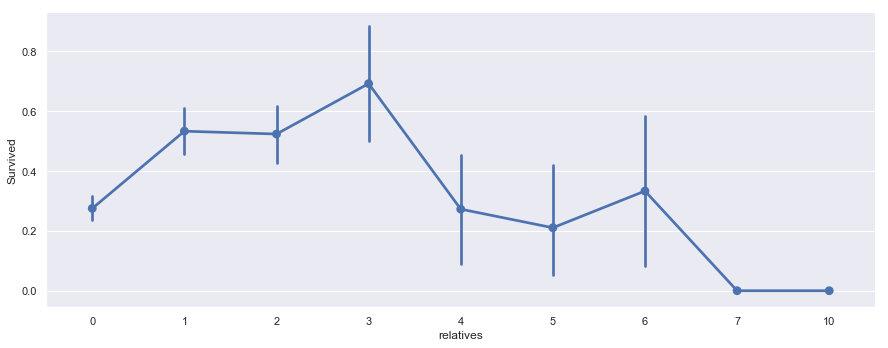

In [418]:
axes = sns.factorplot('relatives','Survived', 
                      data=df_train, aspect = 2.5, )

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


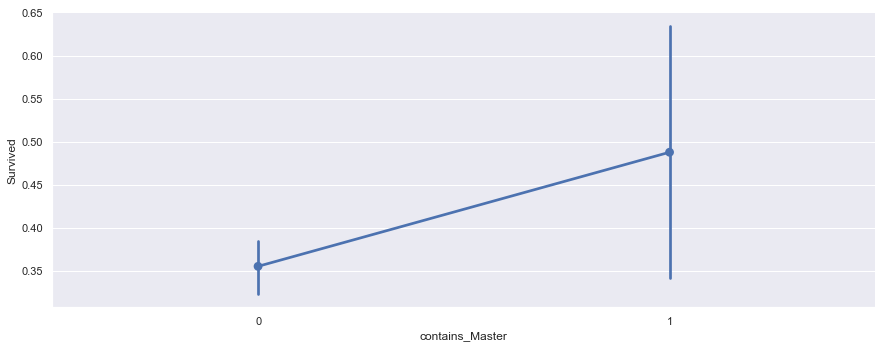

In [419]:
axes = sns.factorplot('contains_Master','Survived', 
                      data=df_train, aspect = 2.5, )

In [ ]:
## This to show that medBoat 10, 

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


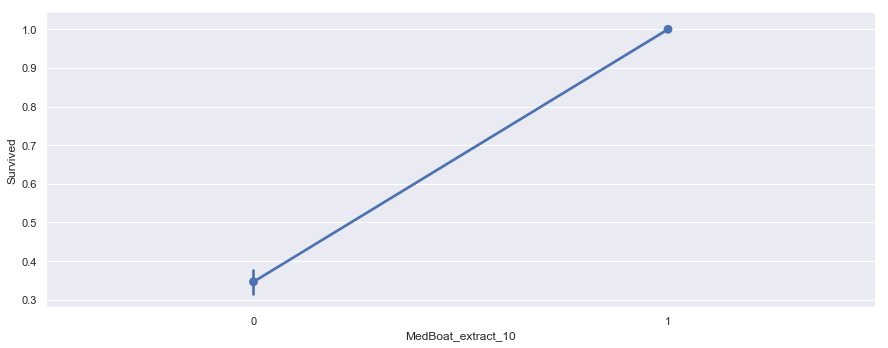

In [421]:
axes = sns.factorplot('MedBoat_extract_10','Survived', 
                      data=df_train, aspect = 2.5, )

In [390]:
df_train.isna().sum() / len(df_train)

traveller_ID             0.0
age                      0.0
Siblings_spouses         0.0
Parchil                  0.0
fare                     0.0
Survived                 0.0
contains_Master          0.0
relatives                0.0
travelled_alone          0.0
travelled_not_alone      0.0
first_class_ticket       0.0
female survival          0.0
children                 0.0
ticket_class             0.0
sex_female               0.0
sex_male                 0.0
MedBoat_extract_0        0.0
MedBoat_extract_1        0.0
MedBoat_extract_10       0.0
MedBoat_extract_11       0.0
MedBoat_extract_12       0.0
MedBoat_extract_13       0.0
MedBoat_extract_13 15    0.0
MedBoat_extract_14       0.0
MedBoat_extract_15       0.0
MedBoat_extract_15 16    0.0
MedBoat_extract_16       0.0
MedBoat_extract_2        0.0
MedBoat_extract_3        0.0
MedBoat_extract_4        0.0
MedBoat_extract_5        0.0
MedBoat_extract_5 7      0.0
MedBoat_extract_6        0.0
MedBoat_extract_7        0.0
MedBoat_extrac

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

X = df_train.drop(['Survived', 'MedBoat_extract_1'], axis = 1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
lr = LogisticRegression()
lr.fit(X,y)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [392]:
lr.score(X,y)

0.9781659388646288

In [393]:
y_train_pred = lr.predict(X_train)
y_train_pred

y_test_pred = lr.predict(X_test)
y_train_pred.shape

(641,)

In [394]:
print('f1 score : ', f1_score(y_test, y_test_pred))
print('Recall score : ', recall_score(y_test, y_test_pred))
print('Accuracy score : ', accuracy_score(y_test, y_test_pred))


f1 score :  0.9674418604651163
Recall score :  0.9629629629629629
Accuracy score :  0.9745454545454545


In [395]:
f1_score = f1_score(y_test, y_test_pred)
f1_score
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 41 columns):
traveller_ID             916 non-null int64
age                      916 non-null float64
Siblings_spouses         916 non-null int64
Parchil                  916 non-null int64
fare                     916 non-null float64
Survived                 916 non-null int64
contains_Master          916 non-null int64
relatives                916 non-null int64
travelled_alone          916 non-null int64
travelled_not_alone      916 non-null int64
first_class_ticket       916 non-null int64
female survival          916 non-null int64
children                 916 non-null int64
ticket_class             916 non-null int64
sex_female               916 non-null uint8
sex_male                 916 non-null uint8
MedBoat_extract_0        916 non-null uint8
MedBoat_extract_1        916 non-null uint8
MedBoat_extract_10       916 non-null uint8
MedBoat_extract_11       916 non-null uint8
MedBoat_ext

## Test

In [396]:
testUrl = 'C:/Users/AKINTOLA/Downloads/data-science-nigeria-ai-in-citie/test.csv'
df_test = pd.read_csv(testUrl)
df_test.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN


In [397]:
import math as mt
mean_age = math.floor(df_train['age'].mean())
df_test['age'] = df_test['age'].fillna(mean_age)

df_test['MedBoat_extract'] = np.where(df_test['MedBoat'].isnull(), 0, df_test['MedBoat'].values)

df_test['cabin_extract'] = np.where(df_test['cabin'].isnull(), 0, df_test['cabin'].values)

df_test['embarked_extract'] = np.where(df_test['embarked'].isnull(), 0, df_test['embarked'].values)

df_test['fare'] = np.where(df_test['fare'].isnull(), 0, mt.floor(df_test['fare'].mean()))

df_test.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,MedBoat_extract,cabin_extract,embarked_extract
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,32,NaN,S,NaN,0,0,S
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,32,NaN,C,C,C,0,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,0.0,0.0,0.0,349235,32,NaN,S,NaN,0,0,S
3,808,3.0,"Ford, Mr. Arthur",male,0.0,0.0,0.0,A/5 1478,32,NaN,S,NaN,0,0,S
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,0.0,0.0,0.0,370374,32,NaN,Q,NaN,0,0,Q


In [398]:
dat_dummy = pd.get_dummies(df_test[['sex','ticket_class', 'MedBoat_extract']])
dat_dummy.head()

,ticket_class,sex_female,sex_male,MedBoat_extract_0,MedBoat_extract_10,MedBoat_extract_11,MedBoat_extract_12,MedBoat_extract_13,MedBoat_extract_13 15 B,MedBoat_extract_14,...,MedBoat_extract_5 9,MedBoat_extract_6,MedBoat_extract_7,MedBoat_extract_8,MedBoat_extract_9,MedBoat_extract_A,MedBoat_extract_B,MedBoat_extract_C,MedBoat_extract_C D,MedBoat_extract_D
0,3.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [399]:
data = [df_test]
for df_test in data:
    df_test['relatives'] = df_test['Siblings_spouses'] + df_test['Parchil']
    df_test.loc[df_test['relatives'] > 0, 'travelled_alone'] = 'No'
    df_test.loc[df_test['relatives'] == 0, 'travelled_alone'] = 'Yes'
    
    

travelled_alone = df_test['travelled_alone'] == 'Yes'
travelled_not_alone = df_test['travelled_alone'] == 'No'    



first_class = df_test['ticket_class'] == 1
female = df_test['sex'] == 'female'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['travelled_alone'] = le.fit_transform(travelled_alone)
df_test['travelled_not_alone'] = le.fit_transform(travelled_not_alone)
df_test['first_class_ticket'] = le.fit_transform(first_class)
df_test['female survival'] = le.fit_transform(female)

df_test.sample(5)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,MedBoat_extract,cabin_extract,embarked_extract,relatives,travelled_alone,travelled_not_alone,first_class_ticket,female survival
227,762,3.0,"Dean, Master. Bertram Vere",male,1.0,1.0,2.0,C.A. 2315,32,NaN,S,10,10,0,S,3.0,0,1,0,0
218,894,3.0,"Johnson, Master. Harold Theodor",male,4.0,1.0,1.0,347742,32,NaN,S,15,15,0,S,2.0,0,1,0,0
267,348,2.0,"Bracken, Mr. James H",male,27.0,0.0,0.0,220367,32,NaN,S,NaN,0,0,S,0.0,1,0,0,0
220,163,1.0,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1.0,0.0,113789,32,NaN,S,8,8,0,S,1.0,0,1,1,1
55,552,2.0,"Rogers, Mr. Reginald Harry",male,19.0,0.0,0.0,28004,32,NaN,S,NaN,0,0,S,0.0,1,0,0,0


In [401]:
def testFunc(x):
    num = x.find('Master')
    if(num > -1):
#         print(x)
        return 1
    else:
        return 0

df_test['contains_Master'] = df_test['name'].apply(testFunc)

In [402]:
children = (df_test['age']  < 16) & (df_test['contains_Master']  == 1 )


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['name'] = le.fit_transform(df_test['name'])
df_test['children'] = le.fit_transform(children)

In [403]:
column_dro = ['sex', 'TickNum', 'embarked_extract', 'cabin_extract', 'name','MedBoat','cabin', 'embarked', 'ticket_class', 'MedBoat_extract']
df_test.drop(column_dro, axis = 1, inplace = True)


from sklearn.preprocessing import MinMaxScaler,  StandardScaler
ss =  StandardScaler()
df_test['age'] = ss.fit_transform(np.array(df_test['age']).reshape(-1, 1))
df_test['fare'] = ss.fit_transform(np.array(df_test['fare']).reshape(-1, 1))

df_test.head()

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,traveller_ID,age,Siblings_spouses,Parchil,fare,relatives,travelled_alone,travelled_not_alone,first_class_ticket,female survival,contains_Master,children
0,1148,0.506016,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,1049,-0.296953,1.0,1.0,0.0,2.0,0,1,0,0,0,0
2,982,-1.367579,0.0,0.0,0.0,0.0,1,0,0,0,0,0
3,808,-1.367579,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4,1195,-1.367579,0.0,0.0,0.0,0.0,1,0,0,0,0,0


In [404]:
df_test.reset_index(drop = True, inplace = True)
dat_dummy.reset_index(drop = True, inplace = True)

In [415]:
df_test = pd.concat([df_test, dat_dummy], axis = 1)

In [406]:
traveller_ID = df_test['traveller_ID']
traveller_ID.shape

(393,)

In [407]:
lr.fit(X,y)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [414]:
traveller_ID = df_test['traveller_ID']
traveller_ID.shape

(393,)

In [410]:
Survival_prediction = lr.predict(df_test)
Survival_prediction

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [423]:
Submission_df = pd.DataFrame({
        'traveller_ID':traveller_ID,
        'Survived': Survival_prediction
        })

Submission_df.shape

(393, 2)

In [424]:
Submission_df.to_csv('Submission_df.csv', index = False)